In [35]:
library(tidyverse)
library(readr)
library(ggplot2)

source("../../../spydr_scripts/functions/get_os.R")

In [36]:
os <- get_os()
if (os == 'linux'){home <- '/home/krista/'
} else if(os == 'osx'){home <- '/Users/67981492/'}

exp_param_path = paste0(home,
                  'Dropbox/volatileValues/simple_rt_experiment_probabilityC/experimental_parameters/prob_reward_schedules/')

setwd(exp_param_path)

In [37]:
#find all of the experimental parameter files 
(files <- dir(path = exp_param_path, pattern = "[a-za-z_0-9.-.csv]*$")
)
files = files[files != 'mod']
files
n_cond = 4
n_sub = 100 #maximum
length(files) == n_cond*n_sub

[1] "hc_0.csv"  "hc_1.csv"  "hc_10.csv" "hc_11.csv" "hc_12.csv" "hc_13.csv"
  [7] "hc_14.csv" "hc_15.csv" "hc_16.csv" "hc_17.csv" "hc_18.csv" "hc_19.csv"
 [13] "hc_2.csv"  "hc_20.csv" "hc_21.csv" "hc_22.csv" "hc_23.csv" "hc_24.csv"
 [19] "hc_25.csv" "hc_26.csv" "hc_27.csv" "hc_28.csv" "hc_29.csv" "hc_3.csv" 
 [25] "hc_30.csv" "hc_31.csv" "hc_32.csv" "hc_33.csv" "hc_34.csv" "hc_35.csv"
 [31] "hc_36.csv" "hc_37.csv" "hc_38.csv" "hc_39.csv" "hc_4.csv"  "hc_40.csv"
 [37] "hc_41.csv" "hc_42.csv" "hc_43.csv" "hc_44.csv" "hc_45.csv" "hc_46.csv"
 [43] "hc_47.csv" "hc_48.csv" "hc_49.csv" "hc_5.csv"  "hc_50.csv" "hc_51.csv"
 [49] "hc_52.csv" "hc_53.csv" "hc_54.csv" "hc_55.csv" "hc_56.csv" "hc_57.csv"
 [55] "hc_58.csv" "hc_59.csv" "hc_6.csv"  "hc_60.csv" "hc_61.csv" "hc_62.csv"
 [61] "hc_63.csv" "hc_64.csv" "hc_65.csv" "hc_66.csv" "hc_67.csv" "hc_68.csv"
 [67] "hc_69.csv" "hc_7.csv"  "hc_70.csv" "hc_71.csv" "hc_72.csv" "hc_73.csv"
 [73] "hc_74.csv" "hc_75.csv" "hc_76.csv" "hc_77.csv" "hc_78.csv" "hc_79.csv"
 [79] "hc_8.csv"  "hc_80.csv" "hc_81.csv" "hc_82.csv" "hc_83.csv" "hc_84.csv"
 [85] "hc_85.csv" "hc_86.csv" "hc_87.csv" "hc_88.csv" "hc_89.csv" "hc_9.csv" 
 [91] "hc_90.csv" "hc_91.csv" "hc_92.csv" "hc_93.csv" "hc_94.csv" "hc_95.csv"
 [97] "hc_96.csv" "hc_97.csv" "hc_98.csv" "hc_99.csv" "hv_0.csv"  "hv_1.csv" 
[103] "hv_10.csv" "hv_11.csv" "hv_12.csv" "hv_13.csv" "hv_14.csv" "hv_15.csv"
[109] "hv_16.csv" "hv_17.csv" "hv_18.csv" "hv_19.csv" "hv_2.csv"  "hv_20.csv"
[115] "hv_21.csv" "hv_22.csv" "hv_23.csv" "hv_24.csv" "hv_25.csv" "hv_26.csv"
[121] "hv_27.csv" "hv_28.csv" "hv_29.csv" "hv_3.csv"  "hv_30.csv" "hv_31.csv"
[127] "hv_32.csv" "hv_33.csv" "hv_34.csv" "hv_35.csv" "hv_36.csv" "hv_37.csv"
[133] "hv_38.csv" "hv_39.csv" "hv_4.csv"  "hv_40.csv" "hv_41.csv" "hv_42.csv"
[139] "hv_43.csv" "hv_44.csv" "hv_45.csv" "hv_46.csv" "hv_47.csv" "hv_48.csv"
[145] "hv_49.csv" "hv_5.csv"  "hv_50.csv" "hv_51.csv" "hv_52.csv" "hv_53.csv"
[151] "hv_54.csv" "hv_55.csv" "hv_56.csv" "hv_57.csv" "hv_58.csv" "hv_59.csv"
[157] "hv_6.csv"  "hv_60.csv" "hv_61.csv" "hv_62.csv" "hv_63.csv" "hv_64.csv"
[163] "hv_65.csv" "hv_66.csv" "hv_67.csv" "hv_68.csv" "hv_69.csv" "hv_7.csv" 
[169] "hv_70.csv" "hv_71.csv" "hv_72.csv" "hv_73.csv" "hv_74.csv" "hv_75.csv"
[175] "hv_76.csv" "hv_77.csv" "hv_78.csv" "hv_79.csv" "hv_8.csv"  "hv_80.csv"
[181] "hv_81.csv" "hv_82.csv" "hv_83.csv" "hv_84.csv" "hv_85.csv" "hv_86.csv"
[187] "hv_87.csv" "hv_88.csv" "hv_89.csv" "hv_9.csv"  "hv_90.csv" "hv_91.csv"
[193] "hv_92.csv" "hv_93.csv" "hv_94.csv" "hv_95.csv" "hv_96.csv" "hv_97.csv"
[199] "hv_98.csv" "hv_99.csv" "lc_0.csv"  "lc_1.csv"  "lc_10.csv" "lc_11.csv"
[205] "lc_12.csv" "lc_13.csv" "lc_14.csv" "lc_15.csv" "lc_16.csv" "lc_17.csv"
[211] "lc_18.csv" "lc_19.csv" "lc_2.csv"  "lc_20.csv" "lc_21.csv" "lc_22.csv"
[217] "lc_23.csv" "lc_24.csv" "lc_25.csv" "lc_26.csv" "lc_27.csv" "lc_28.csv"
[223] "lc_29.csv" "lc_3.csv"  "lc_30.csv" "lc_31.csv" "lc_32.csv" "lc_33.csv"
[229] "lc_34.csv" "lc_35.csv" "lc_36.csv" "lc_37.csv" "lc_38.csv" "lc_39.csv"
[235] "lc_4.csv"  "lc_40.csv" "lc_41.csv" "lc_42.csv" "lc_43.csv" "lc_44.csv"
[241] "lc_45.csv" "lc_46.csv" "lc_47.csv" "lc_48.csv" "lc_49.csv" "lc_5.csv" 
[247] "lc_50.csv" "lc_51.csv" "lc_52.csv" "lc_53.csv" "lc_54.csv" "lc_55.csv"
[253] "lc_56.csv" "lc_57.csv" "lc_58.csv" "lc_59.csv" "lc_6.csv"  "lc_60.csv"
[259] "lc_61.csv" "lc_62.csv" "lc_63.csv" "lc_64.csv" "lc_65.csv" "lc_66.csv"
[265] "lc_67.csv" "lc_68.csv" "lc_69.csv" "lc_7.csv"  "lc_70.csv" "lc_71.csv"
[271] "lc_72.csv" "lc_73.csv" "lc_74.csv" "lc_75.csv" "lc_76.csv" "lc_77.csv"
[277] "lc_78.csv" "lc_79.csv" "lc_8.csv"  "lc_80.csv" "lc_81.csv" "lc_82.csv"
[283] "lc_83.csv" "lc_84.csv" "lc_85.csv" "lc_86.csv" "lc_87.csv" "lc_88.csv"
[289] "lc_89.csv" "lc_9.csv"  "lc_90.csv" "lc_91.csv" "lc_92.csv" "lc_93.csv"
[295] "lc_94.csv" "lc_95.csv" "lc_96.csv" "lc_97.csv" "lc_98.csv" "lc_99.csv"
[301] "lv_0.csv"  "lv_1.csv"  "lv_10.csv" "lv_11.csv" "lv_12.csv" "lv_13.csv"
[307] "lv_14.csv" "lv_15

[1] "hc_0.csv"  "hc_1.csv"  "hc_10.csv" "hc_11.csv" "hc_12.csv" "hc_13.csv"
  [7] "hc_14.csv" "hc_15.csv" "hc_16.csv" "hc_17.csv" "hc_18.csv" "hc_19.csv"
 [13] "hc_2.csv"  "hc_20.csv" "hc_21.csv" "hc_22.csv" "hc_23.csv" "hc_24.csv"
 [19] "hc_25.csv" "hc_26.csv" "hc_27.csv" "hc_28.csv" "hc_29.csv" "hc_3.csv" 
 [25] "hc_30.csv" "hc_31.csv" "hc_32.csv" "hc_33.csv" "hc_34.csv" "hc_35.csv"
 [31] "hc_36.csv" "hc_37.csv" "hc_38.csv" "hc_39.csv" "hc_4.csv"  "hc_40.csv"
 [37] "hc_41.csv" "hc_42.csv" "hc_43.csv" "hc_44.csv" "hc_45.csv" "hc_46.csv"
 [43] "hc_47.csv" "hc_48.csv" "hc_49.csv" "hc_5.csv"  "hc_50.csv" "hc_51.csv"
 [49] "hc_52.csv" "hc_53.csv" "hc_54.csv" "hc_55.csv" "hc_56.csv" "hc_57.csv"
 [55] "hc_58.csv" "hc_59.csv" "hc_6.csv"  "hc_60.csv" "hc_61.csv" "hc_62.csv"
 [61] "hc_63.csv" "hc_64.csv" "hc_65.csv" "hc_66.csv" "hc_67.csv" "hc_68.csv"
 [67] "hc_69.csv" "hc_7.csv"  "hc_70.csv" "hc_71.csv" "hc_72.csv" "hc_73.csv"
 [73] "hc_74.csv" "hc_75.csv" "hc_76.csv" "hc_77.csv" "hc_78.csv" "hc_79.csv"
 [79] "hc_8.csv"  "hc_80.csv" "hc_81.csv" "hc_82.csv" "hc_83.csv" "hc_84.csv"
 [85] "hc_85.csv" "hc_86.csv" "hc_87.csv" "hc_88.csv" "hc_89.csv" "hc_9.csv" 
 [91] "hc_90.csv" "hc_91.csv" "hc_92.csv" "hc_93.csv" "hc_94.csv" "hc_95.csv"
 [97] "hc_96.csv" "hc_97.csv" "hc_98.csv" "hc_99.csv" "hv_0.csv"  "hv_1.csv" 
[103] "hv_10.csv" "hv_11.csv" "hv_12.csv" "hv_13.csv" "hv_14.csv" "hv_15.csv"
[109] "hv_16.csv" "hv_17.csv" "hv_18.csv" "hv_19.csv" "hv_2.csv"  "hv_20.csv"
[115] "hv_21.csv" "hv_22.csv" "hv_23.csv" "hv_24.csv" "hv_25.csv" "hv_26.csv"
[121] "hv_27.csv" "hv_28.csv" "hv_29.csv" "hv_3.csv"  "hv_30.csv" "hv_31.csv"
[127] "hv_32.csv" "hv_33.csv" "hv_34.csv" "hv_35.csv" "hv_36.csv" "hv_37.csv"
[133] "hv_38.csv" "hv_39.csv" "hv_4.csv"  "hv_40.csv" "hv_41.csv" "hv_42.csv"
[139] "hv_43.csv" "hv_44.csv" "hv_45.csv" "hv_46.csv" "hv_47.csv" "hv_48.csv"
[145] "hv_49.csv" "hv_5.csv"  "hv_50.csv" "hv_51.csv" "hv_52.csv" "hv_53.csv"
[151] "hv_54.csv" "hv_55.csv" "hv_56.csv" "hv_57.csv" "hv_58.csv" "hv_59.csv"
[157] "hv_6.csv"  "hv_60.csv" "hv_61.csv" "hv_62.csv" "hv_63.csv" "hv_64.csv"
[163] "hv_65.csv" "hv_66.csv" "hv_67.csv" "hv_68.csv" "hv_69.csv" "hv_7.csv" 
[169] "hv_70.csv" "hv_71.csv" "hv_72.csv" "hv_73.csv" "hv_74.csv" "hv_75.csv"
[175] "hv_76.csv" "hv_77.csv" "hv_78.csv" "hv_79.csv" "hv_8.csv"  "hv_80.csv"
[181] "hv_81.csv" "hv_82.csv" "hv_83.csv" "hv_84.csv" "hv_85.csv" "hv_86.csv"
[187] "hv_87.csv" "hv_88.csv" "hv_89.csv" "hv_9.csv"  "hv_90.csv" "hv_91.csv"
[193] "hv_92.csv" "hv_93.csv" "hv_94.csv" "hv_95.csv" "hv_96.csv" "hv_97.csv"
[199] "hv_98.csv" "hv_99.csv" "lc_0.csv"  "lc_1.csv"  "lc_10.csv" "lc_11.csv"
[205] "lc_12.csv" "lc_13.csv" "lc_14.csv" "lc_15.csv" "lc_16.csv" "lc_17.csv"
[211] "lc_18.csv" "lc_19.csv" "lc_2.csv"  "lc_20.csv" "lc_21.csv" "lc_22.csv"
[217] "lc_23.csv" "lc_24.csv" "lc_25.csv" "lc_26.csv" "lc_27.csv" "lc_28.csv"
[223] "lc_29.csv" "lc_3.csv"  "lc_30.csv" "lc_31.csv" "lc_32.csv" "lc_33.csv"
[229] "lc_34.csv" "lc_35.csv" "lc_36.csv" "lc_37.csv" "lc_38.csv" "lc_39.csv"
[235] "lc_4.csv"  "lc_40.csv" "lc_41.csv" "lc_42.csv" "lc_43.csv" "lc_44.csv"
[241] "lc_45.csv" "lc_46.csv" "lc_47.csv" "lc_48.csv" "lc_49.csv" "lc_5.csv" 
[247] "lc_50.csv" "lc_51.csv" "lc_52.csv" "lc_53.csv" "lc_54.csv" "lc_55.csv"
[253] "lc_56.csv" "lc_57.csv" "lc_58.csv" "lc_59.csv" "lc_6.csv"  "lc_60.csv"
[259] "lc_61.csv" "lc_62.csv" "lc_63.csv" "lc_64.csv" "lc_65.csv" "lc_66.csv"
[265] "lc_67.csv" "lc_68.csv" "lc_69.csv" "lc_7.csv"  "lc_70.csv" "lc_71.csv"
[271] "lc_72.csv" "lc_73.csv" "lc_74.csv" "lc_75.csv" "lc_76.csv" "lc_77.csv"
[277] "lc_78.csv" "lc_79.csv" "lc_8.csv"  "lc_80.csv" "lc_81.csv" "lc_82.csv"
[283] "lc_83.csv" "lc_84.csv" "lc_85.csv" "lc_86.csv" "lc_87.csv" "lc_88.csv"
[289] "lc_89.csv" "lc_9.csv"  "lc_90.csv" "lc_91.csv" "lc_92.csv" "lc_93.csv"
[295] "lc_94.csv" "lc_95.csv" "lc_96.csv" "lc_97.csv" "lc_98.csv" "lc_99.csv"
[301] "lv_0.csv"  "lv_1.csv"  "lv_10.csv" "lv_11.csv" "lv_12.csv" "lv_13.csv"
[307] "lv_14.csv" "lv_15

[1] TRUE

In [38]:
#read csv and extract condition name and trialset from filename generated by experimental 
#script
my_read_csv <- function(x) {
  out <- read_csv(x,col_types = cols())
  condition <- str_extract(x, "^[a-z]*")
  trialset <- str_extract(x, "(?<=_)\\d+")
  epoch_n <- cumsum(out$cp == 1)
  trial <- seq(1, nrow(out))
    
 
  c_out <- cbind(out, condition) 
  t_out <- cbind(c_out, trial)
  ts_out <- cbind(t_out, trialset)
  e_out <- cbind(ts_out, epoch_n)

}

In [39]:

read_csv_print <- function(x, first_sub_id=761, 
    exp_param_path_mod = paste0(home, 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/experimental_parameters/prob_reward_schedules/mod/')) {
    
  out <- read_csv(x,col_types = cols())
  condition <- str_extract(x, "^[a-z]*")
  trialset <- str_extract(x, "(?<=_)\\d+")
  epoch_n <- cumsum(out$cp == 1)
  trial <- seq(1, nrow(out))
  ID <- rep(as.numeric(trialset) + first_sub_id, max(trial))
     
  c_out <- cbind(out, condition) 
  t_out <- cbind(c_out, trial)
  ts_out <- cbind(t_out, trialset)
  e_out <- cbind(ts_out, epoch_n)
  fin_out <- cbind(e_out, ID)
  print(colnames(fin_out))
  fin_out_edit <- fin_out %>% group_by(epoch_n) %>% mutate(epoch_trial=cumsum(c(1, diff(trial))), n_epoch_trials = max(epoch_trial))

  fin_out_edit <- fin_out_edit %>% group_by(epoch_n) %>% filter(epoch_trial==n_epoch_trials) %>% group_by(p_t0 = c_prob_epoch_t0)

  fin_out_edit$p_id_solution <- ifelse(fin_out_edit$p_t0 >= 0.5, 112, 111)
    
#     test <- clean_df_ordered %>% group_by(ID, condition, epoch_n) %>% 
# group_by(prop_112=sum(high_val_cue == 112) / max(epoch_trial), n_epoch_trials = max(epoch_trial))%>% 
# group_by(high_p_cue=ifelse(prop_112 >= 0.5, 112, 111)) 

  fin_out[,'p_id_solution'] <- fin_out_edit[rep(row.names(fin_out_edit),fin_out_edit$n_epoch_trials), 'p_id_solution']
    
   if (condition == 'hc'){high_p = 0.65
    }else if(condition == 'lc'){high_p = 0.85
    }else if (condition == 'lv' | condition == 'hv'){high_p = 0.75} 
        

  fin_out$high_p <- high_p 
  fin_out$low_p <- 1 - high_p 
    
  fin_out[, 't0_p'] <- ifelse(fin_out$p_id_solution == 112, fin_out$high_p, fin_out$low_p)
  fin_out[, 't1_p'] <- 1 - fin_out$t0_p
  fin_out$trial = trial 
  fin_out <- fin_out %>% group_by(epoch_n)  %>%  group_by(epoch_trial=cumsum(c(1, diff(trial))))
  fin_out$high_p <- NULL
  fin_out$low_p <- NULL

  write.csv(fin_out, paste0(exp_param_path_mod,x), row.names=FALSE)
return(fin_out)
}

In [40]:
df <- lapply(files, read_csv_print) %>% reduce(rbind)
head(df)

 [1] "r_t1"            "r_t2"            "c_prob"          "c_prob_epoch_t0"
 [5] "c_prob_epoch_t1" "cp"              "obs_cp"          "mu_rewards"     
 [9] "std_rewards"     "condition"       "trial"           "trialset"       
[13] "epoch_n"         "ID"             
 [1] "r_t1"            "r_t2"            "c_prob"          "c_prob_epoch_t0"
 [5] "c_prob_epoch_t1" "cp"              "obs_cp"          "mu_rewards"     
 [9] "std_rewards"     "condition"       "trial"           "trialset"       
[13] "epoch_n"         "ID"             
 [1] "r_t1"            "r_t2"            "c_prob"          "c_prob_epoch_t0"
 [5] "c_prob_epoch_t1" "cp"              "obs_cp"          "mu_rewards"     
 [9] "std_rewards"     "condition"       "trial"           "trialset"       
[13] "epoch_n"         "ID"             
 [1] "r_t1"            "r_t2"            "c_prob"          "c_prob_epoch_t0"
 [5] "c_prob_epoch_t1" "cp"              "obs_cp"          "mu_rewards"     
 [9] "std_rewards"     "condit

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding cha

“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and facto

“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and facto

“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and facto

“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and facto

“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and facto

“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and facto

“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and facto

“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and facto

r_t1,r_t2,c_prob,c_prob_epoch_t0,c_prob_epoch_t1,cp,obs_cp,mu_rewards,std_rewards,condition,trial,trialset,epoch_n,ID,p_id_solution,t0_p,t1_p,epoch_trial
2.528877,0.000000,0.000000,1.000000,0.000000,0,0,3,1,hc,1,0,0,761,111,0.35,0.65,1
0.000000,3.978021,0.500000,0.500000,0.500000,0,1,3,1,hc,2,0,0,761,111,0.35,0.65,2
0.000000,2.754457,0.666667,0.333333,0.666667,0,0,3,1,hc,3,0,0,761,111,0.35,0.65,3
0.000000,3.330826,0.750000,0.250000,0.750000,0,0,3,1,hc,4,0,0,761,111,0.35,0.65,4
0.000000,2.527291,0.800000,0.200000,0.800000,0,0,3,1,hc,5,0,0,761,111,0.35,0.65,5
3.036967,0.000000,0.666667,0.333333,0.666667,0,1,3,1,hc,6,0,0,761,111,0.35,0.65,6


In [ ]:
# df <- lapply(files, my_read_csv) %>% reduce(rbind)
# head(df)

In [41]:
df$coded_condition <- recode(df$condition,
  'lc' = 0,
  'hc' = 1,
  'hv' = 2,
  'lv' = 3, 
  )
#check 
df$coded_condition[0:5]; df$condition[0:5]
df$trialset <- as.numeric(as.character(df$trialset))
max(df$trialset)
head(df)

[1] 1 1 1 1 1

[1] "hc" "hc" "hc" "hc" "hc"

[1] 99

r_t1,r_t2,c_prob,c_prob_epoch_t0,c_prob_epoch_t1,cp,obs_cp,mu_rewards,std_rewards,condition,trial,trialset,epoch_n,ID,p_id_solution,t0_p,t1_p,epoch_trial,coded_condition
2.528877,0.000000,0.000000,1.000000,0.000000,0,0,3,1,hc,1,0,0,761,111,0.35,0.65,1,1
0.000000,3.978021,0.500000,0.500000,0.500000,0,1,3,1,hc,2,0,0,761,111,0.35,0.65,2,1
0.000000,2.754457,0.666667,0.333333,0.666667,0,0,3,1,hc,3,0,0,761,111,0.35,0.65,3,1
0.000000,3.330826,0.750000,0.250000,0.750000,0,0,3,1,hc,4,0,0,761,111,0.35,0.65,4,1
0.000000,2.527291,0.800000,0.200000,0.800000,0,0,3,1,hc,5,0,0,761,111,0.35,0.65,5,1
3.036967,0.000000,0.666667,0.333333,0.666667,0,1,3,1,hc,6,0,0,761,111,0.35,0.65,6,1


In [42]:
#match subjects to their trialsets 
#this works because each subject had a sequential trialset number, incremented by their 
#coax ID 
initial_subject = 761
df$ID <- df$trialset + initial_subject 

In [43]:
head(df)

r_t1,r_t2,c_prob,c_prob_epoch_t0,c_prob_epoch_t1,cp,obs_cp,mu_rewards,std_rewards,condition,trial,trialset,epoch_n,ID,p_id_solution,t0_p,t1_p,epoch_trial,coded_condition
2.528877,0.000000,0.000000,1.000000,0.000000,0,0,3,1,hc,1,0,0,761,111,0.35,0.65,1,1
0.000000,3.978021,0.500000,0.500000,0.500000,0,1,3,1,hc,2,0,0,761,111,0.35,0.65,2,1
0.000000,2.754457,0.666667,0.333333,0.666667,0,0,3,1,hc,3,0,0,761,111,0.35,0.65,3,1
0.000000,3.330826,0.750000,0.250000,0.750000,0,0,3,1,hc,4,0,0,761,111,0.35,0.65,4,1
0.000000,2.527291,0.800000,0.200000,0.800000,0,0,3,1,hc,5,0,0,761,111,0.35,0.65,5,1
3.036967,0.000000,0.666667,0.333333,0.666667,0,1,3,1,hc,6,0,0,761,111,0.35,0.65,6,1


In [13]:
#create epoch_trial variable
df <- df %>% 
    group_by(trialset, condition, epoch_n)  %>%  mutate(epoch_trial=cumsum(c(1, diff(trial))))

In [14]:
#check that conditions have equal n
table(df$condition); table(df$coded_condition)


   hc    hv    lc    lv 
60000 60000 60000 60000 


    0     1     2     3 
60000 60000 60000 60000 

In [15]:
 test <- df %>% 
    group_by(epoch_n, condition, trialset)  %>% filter(epoch_trial == max(epoch_trial)) %>%
    group_by(max_p=pmax(c_prob_epoch_t0, c_prob_epoch_t1)) %>% 
    select(c_prob_epoch_t0, max_p, epoch_n, epoch_trial, condition, trialset, ID)                                                   

In [16]:
test

c_prob_epoch_t0,max_p,epoch_n,epoch_trial,condition,trialset,ID
0.277778,0.722222,0,36,hc,0,761
0.708333,0.708333,1,24,hc,0,761
0.375000,0.625000,2,32,hc,0,761
0.640000,0.640000,3,25,hc,0,761
0.500000,0.500000,4,32,hc,0,761
0.592593,0.592593,5,27,hc,0,761
0.272727,0.727273,6,22,hc,0,761
0.545455,0.545455,7,22,hc,0,761
0.320000,0.680000,8,25,hc,0,761
0.652174,0.652174,9,23,hc,0,761


In [44]:
#get correct targets
test[test$c_prob_epoch_t0 != test$max_p, 'correct_identity'] = 112
test[test$c_prob_epoch_t0 == test$max_p, 'correct_identity'] = 111

In [45]:

hc_high_p = 0.65
lc_high_p = 0.85

v_high_p = 0.75

test[test$condition == 'hc', 'high_p'] = hc_high_p
test[test$condition == 'lc', 'high_p'] = lc_high_p
test[(test$condition == 'lv'| test$condition == 'hv'), 'high_p'] = v_high_p

test[, 'low_p'] <- 1 - test$high_p

In [46]:
test_expanded <- test[rep(row.names(test),test$epoch_trial), ]

In [47]:
test_expanded[, 't0_p'] <- ifelse(test_expanded$correct_identity == 111, test_expanded$high_p, test_expanded$low_p)

In [48]:
test_expanded[, 't1_p'] <- 1 -  test_expanded$t0_p

In [49]:
head(test_expanded)

c_prob_epoch_t0,max_p,epoch_n,epoch_trial,condition,trialset,ID,correct_identity,high_p,low_p,t0_p,t1_p
0.277778,0.722222,0,36,hc,0,761,112,0.65,0.35,0.35,0.65
0.277778,0.722222,0,36,hc,0,761,112,0.65,0.35,0.35,0.65
0.277778,0.722222,0,36,hc,0,761,112,0.65,0.35,0.35,0.65
0.277778,0.722222,0,36,hc,0,761,112,0.65,0.35,0.35,0.65
0.277778,0.722222,0,36,hc,0,761,112,0.65,0.35,0.35,0.65
0.277778,0.722222,0,36,hc,0,761,112,0.65,0.35,0.35,0.65


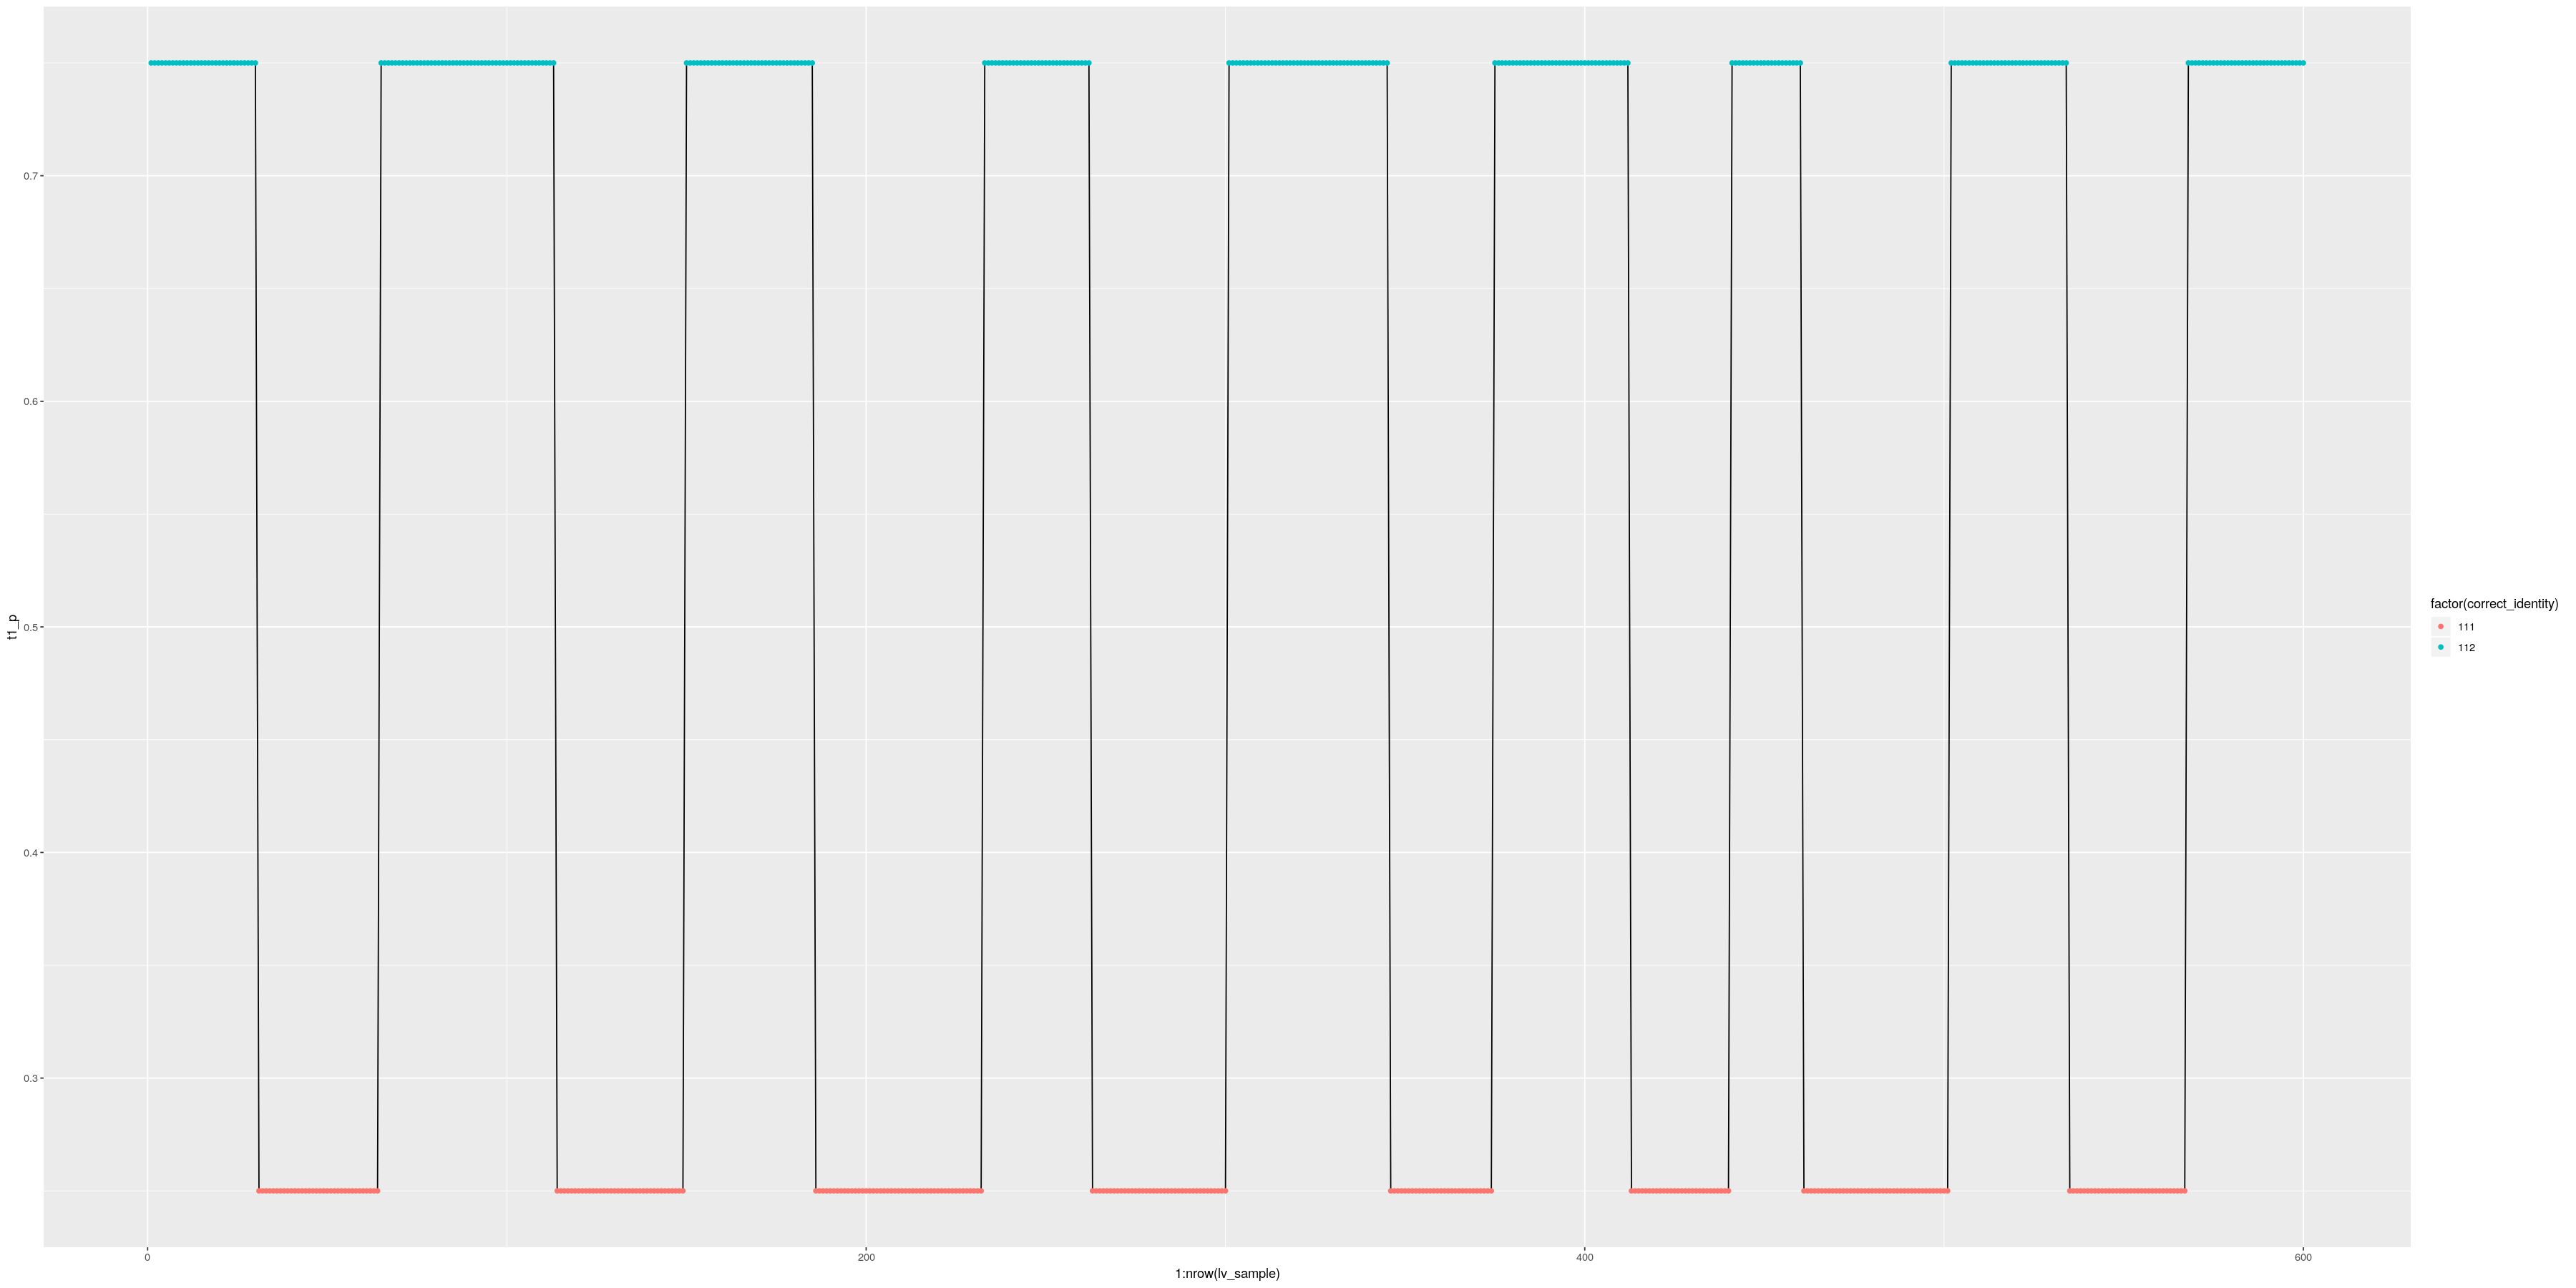

In [50]:
options(repr.plot.width=30, repr.plot.height=15)

lv_sample <- subset(test_expanded, ID == 761 &condition=='lv')
hv_sample <- subset(test_expanded, ID == 761 &condition=='hv')

lc_sample <- subset(test_expanded, ID == 761 &condition=='lc')
hc_sample <- subset(test_expanded, ID == 761 &condition=='hc')

ggplot(lv_sample, aes(1:nrow(lv_sample), t1_p)) + geom_line() + geom_point(aes(colour = factor(correct_identity))) 

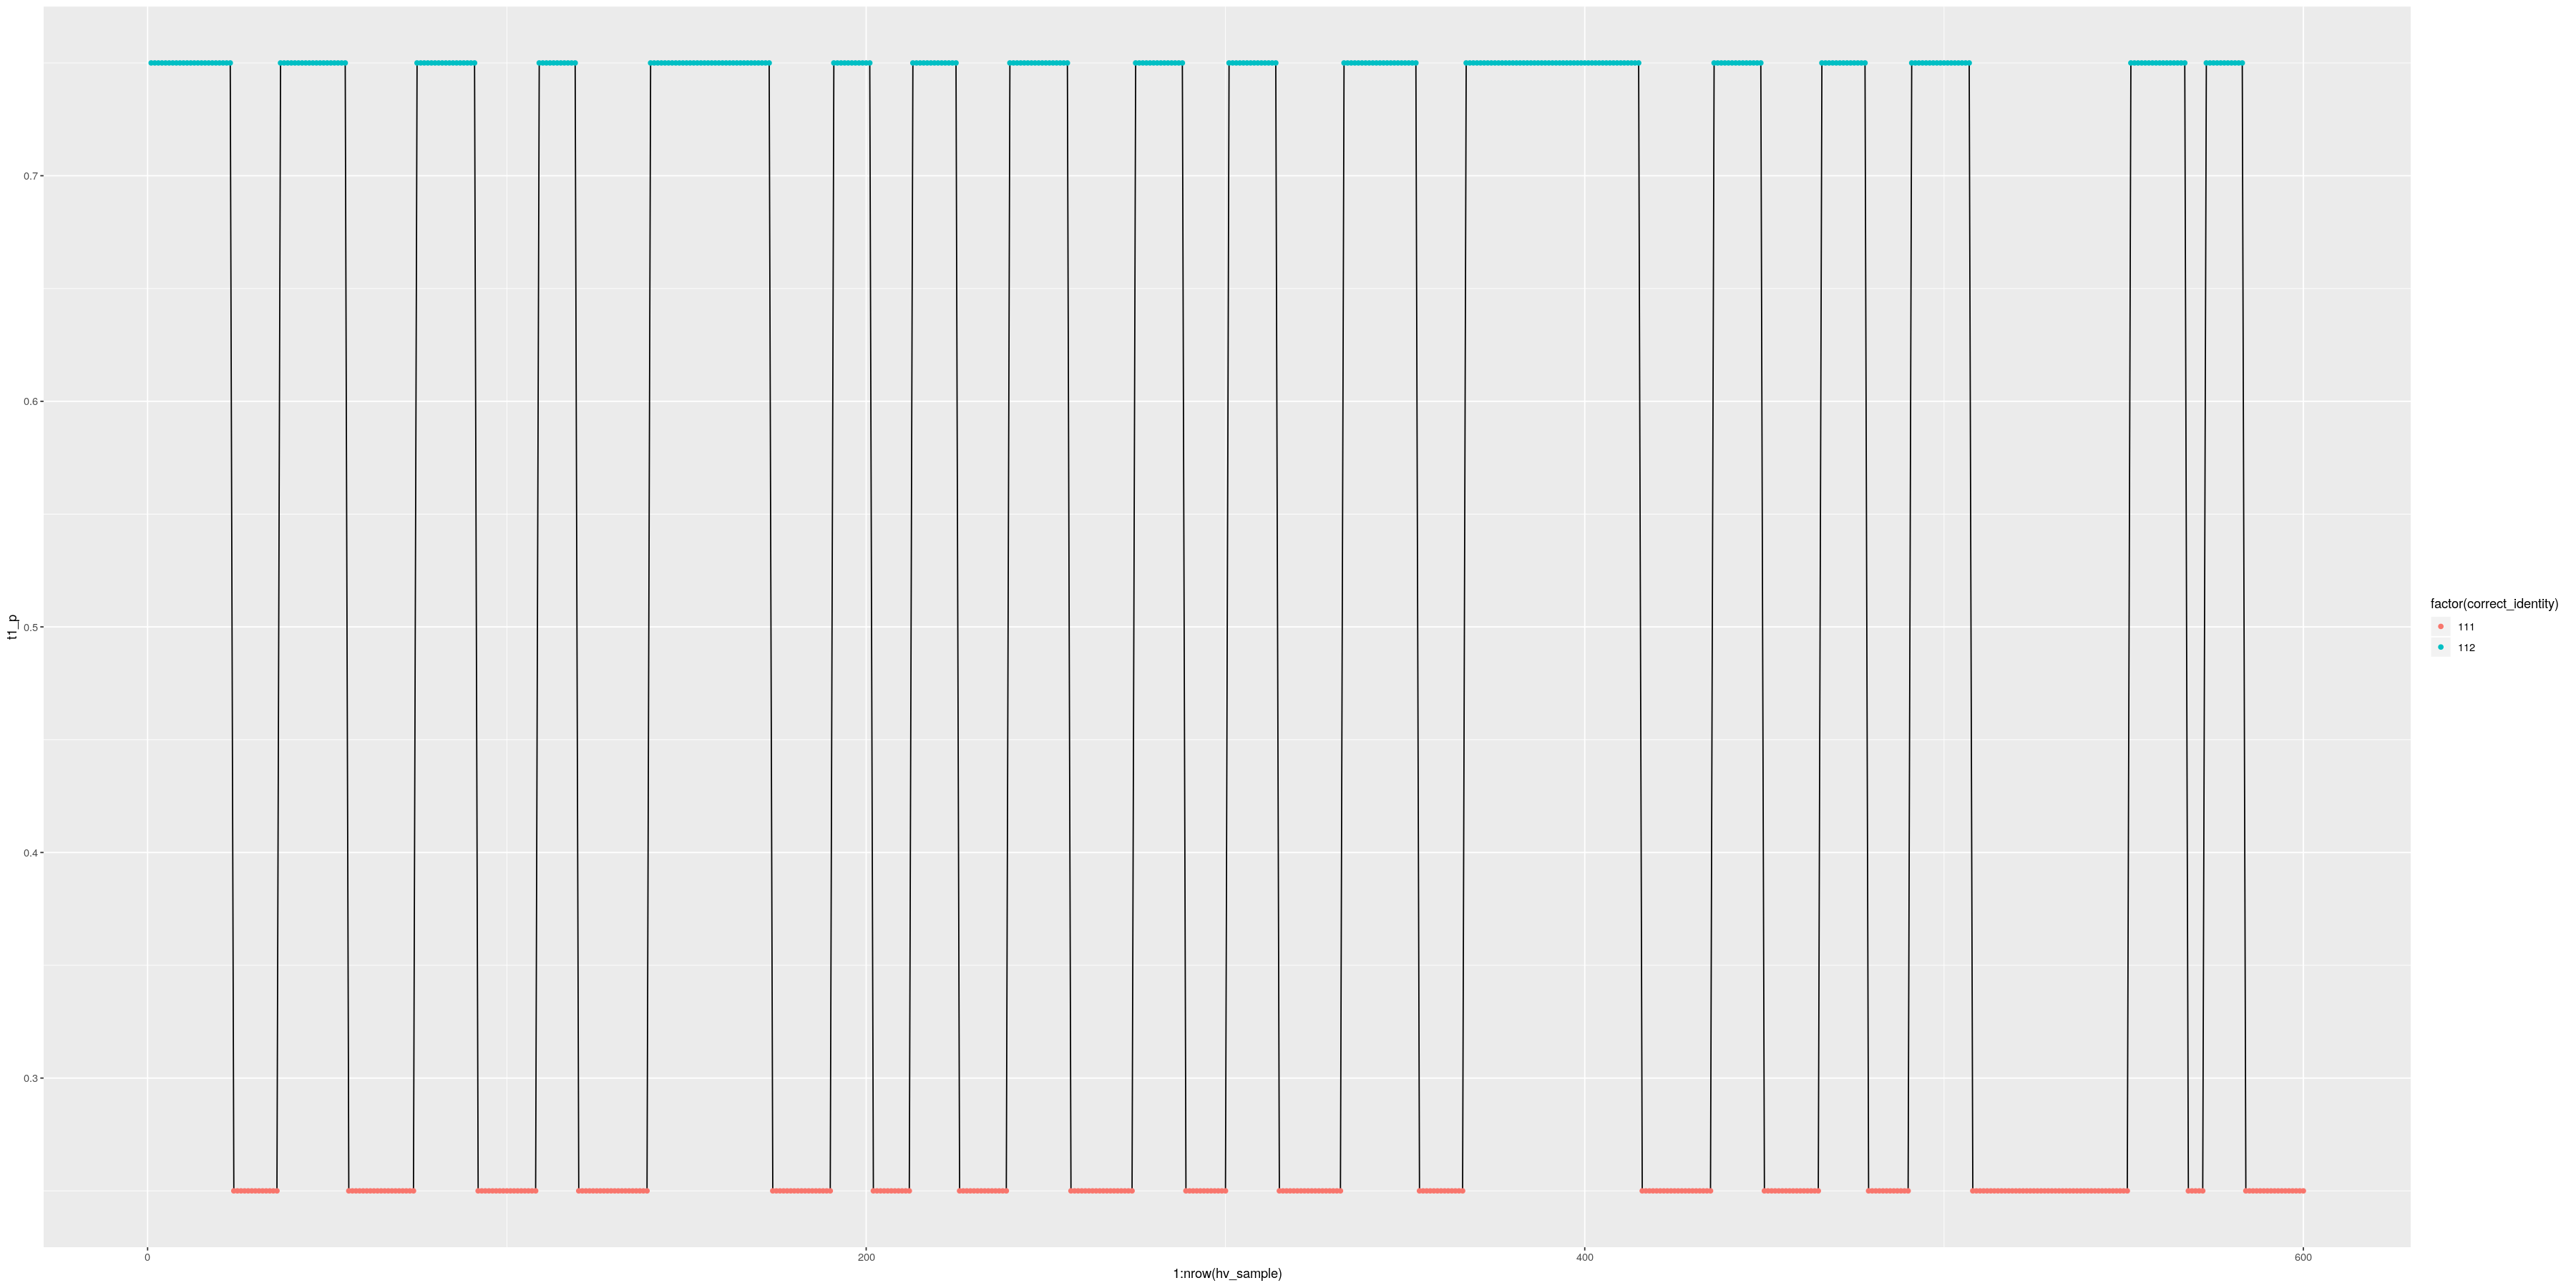

In [51]:
ggplot(hv_sample, aes(1:nrow(hv_sample), t1_p)) + geom_line() + geom_point(aes(colour = factor(correct_identity)))

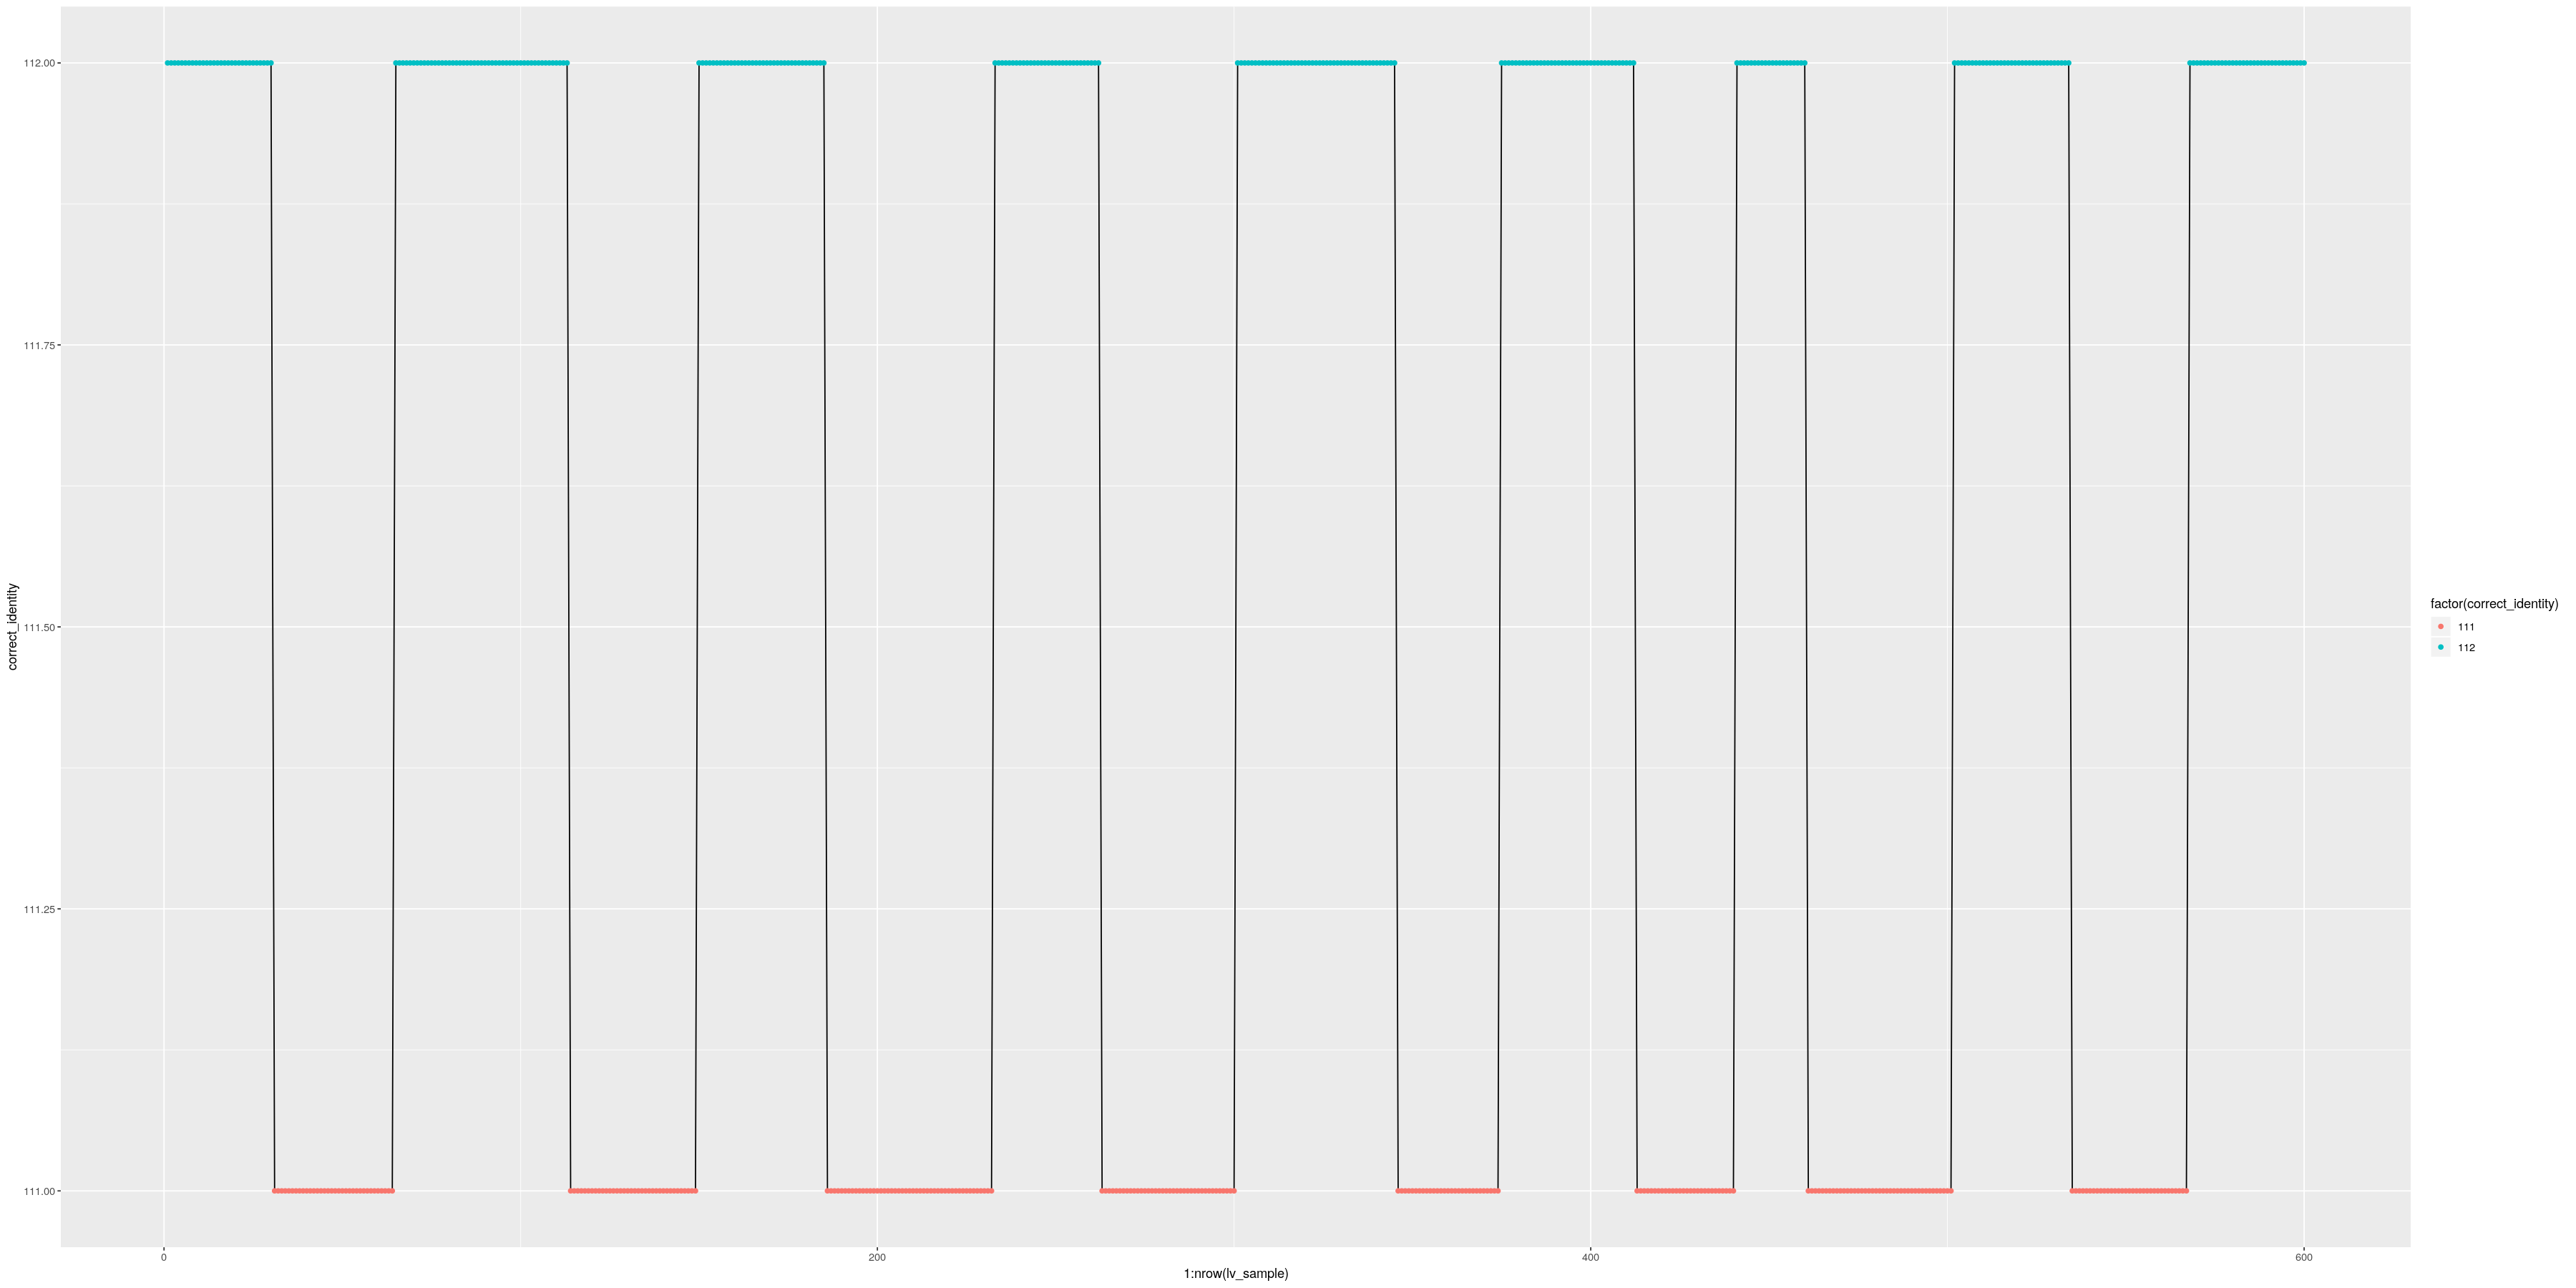

In [52]:
options(repr.plot.width=30, repr.plot.height=15)

lv_sample <- subset(test_expanded, ID == 761 &condition=='lv')
hv_sample <- subset(test_expanded, ID == 761 &condition=='hv')

ggplot(lv_sample, aes(1:nrow(lv_sample), correct_identity)) + geom_line() + geom_point(aes(colour = factor(correct_identity)))

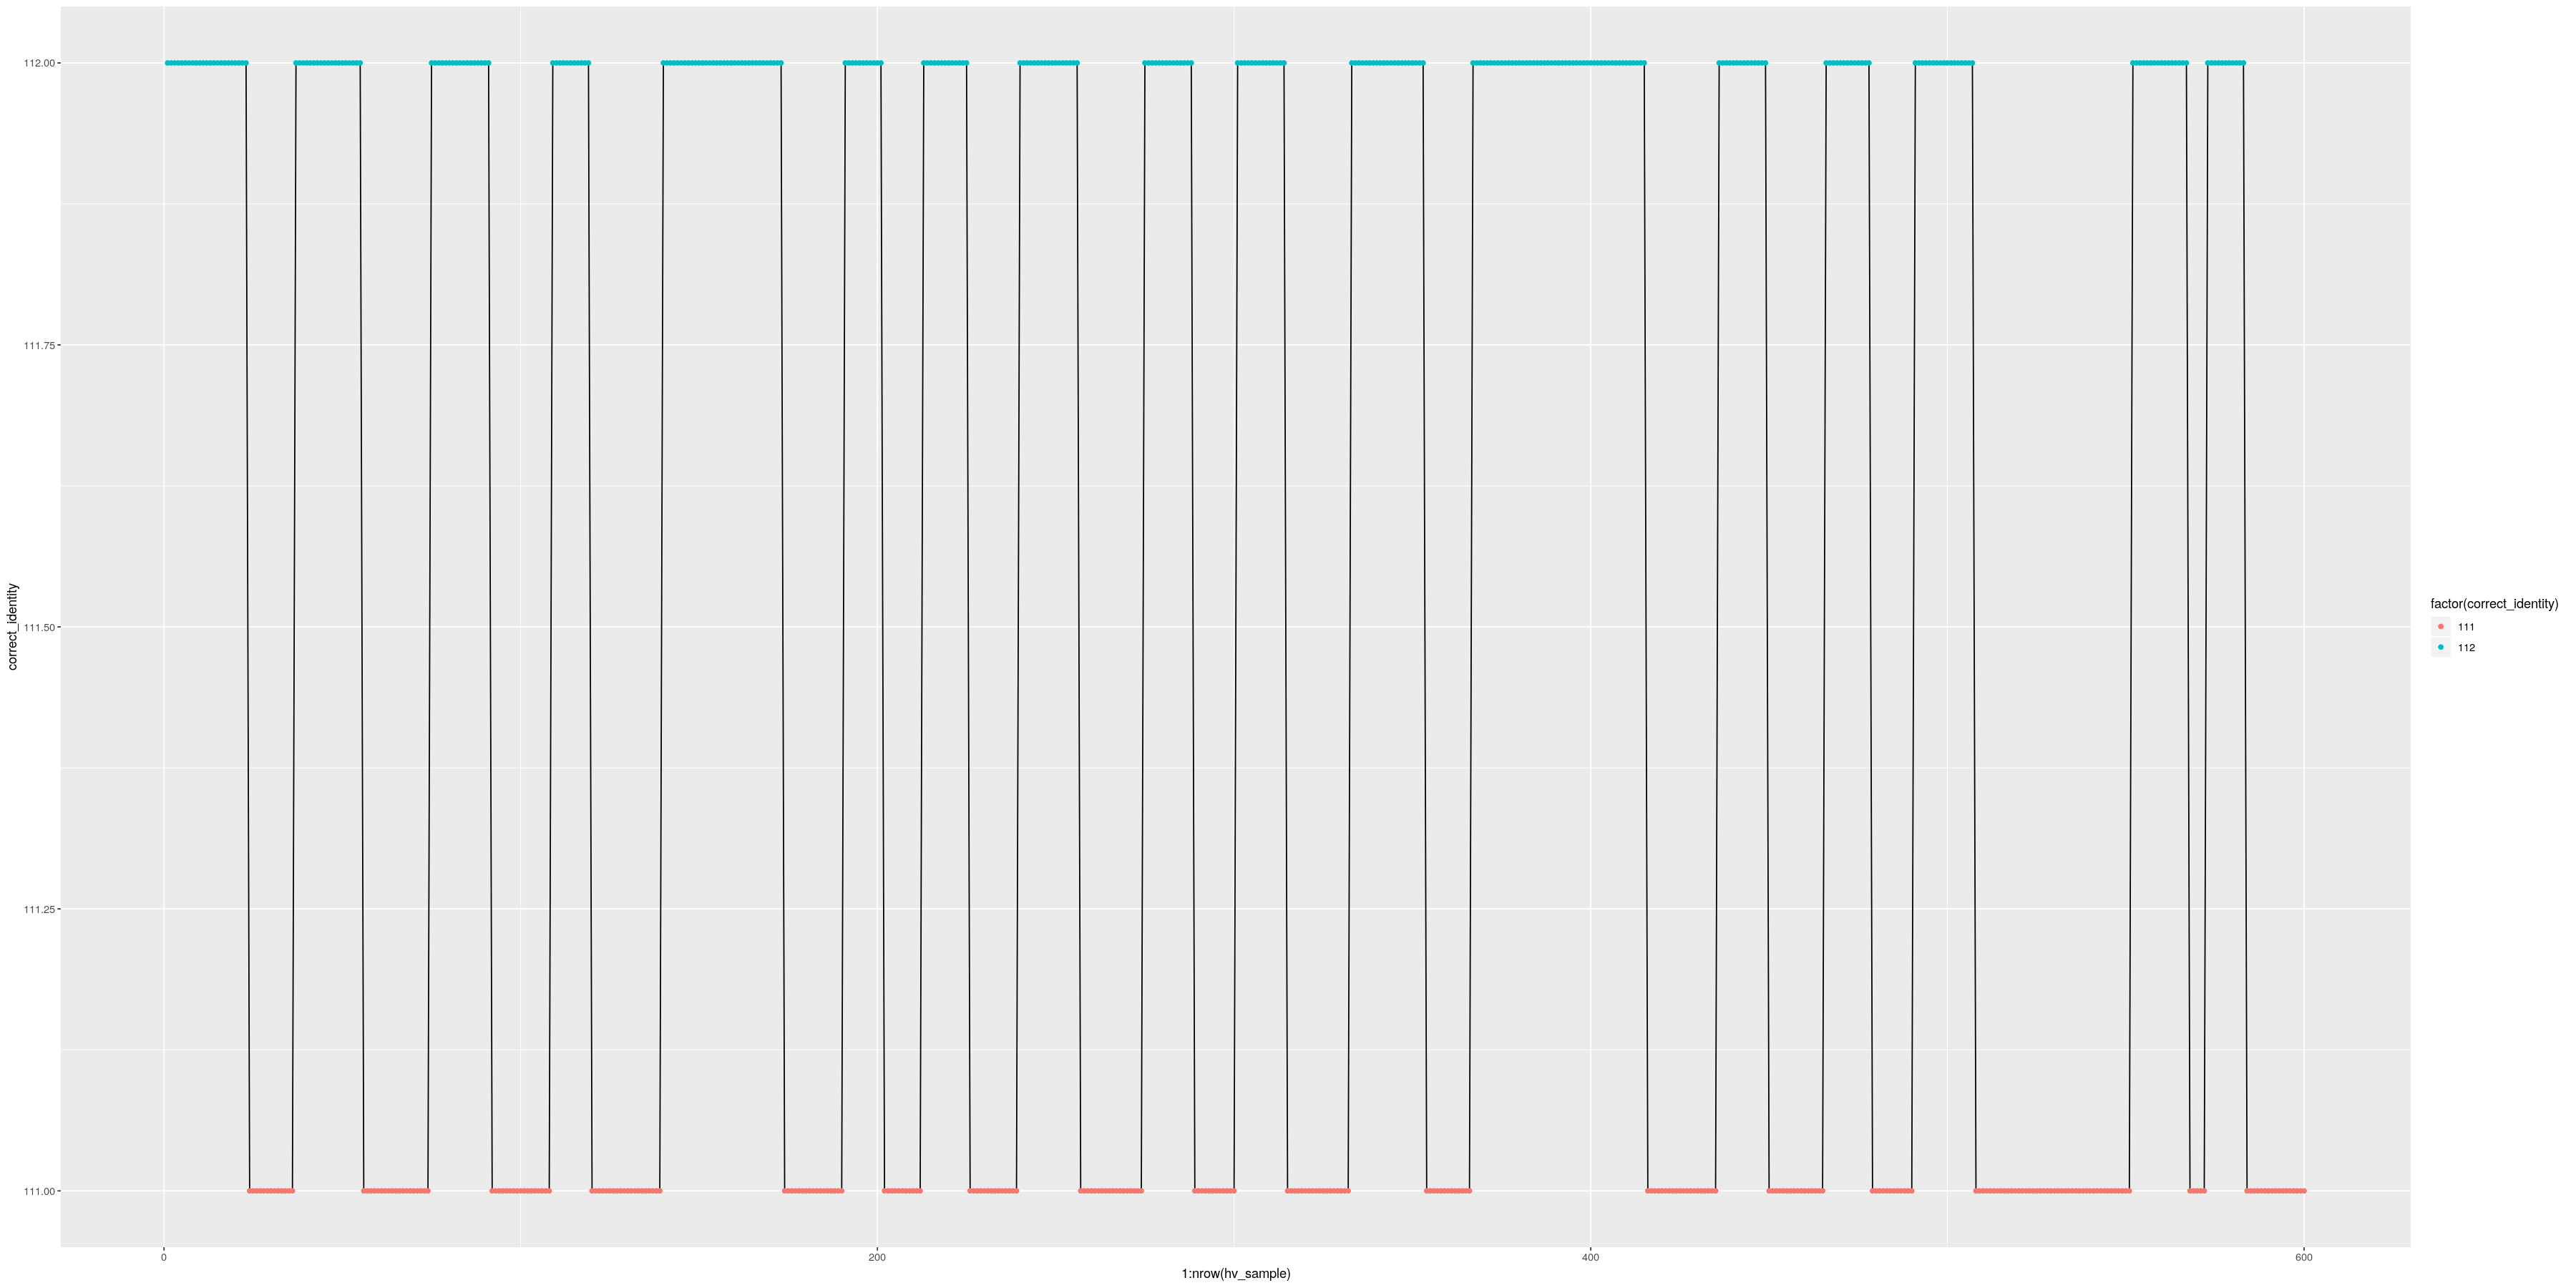

In [53]:
ggplot(hv_sample, aes(1:nrow(hv_sample), correct_identity)) + geom_line() + geom_point(aes(colour = factor(correct_identity)))

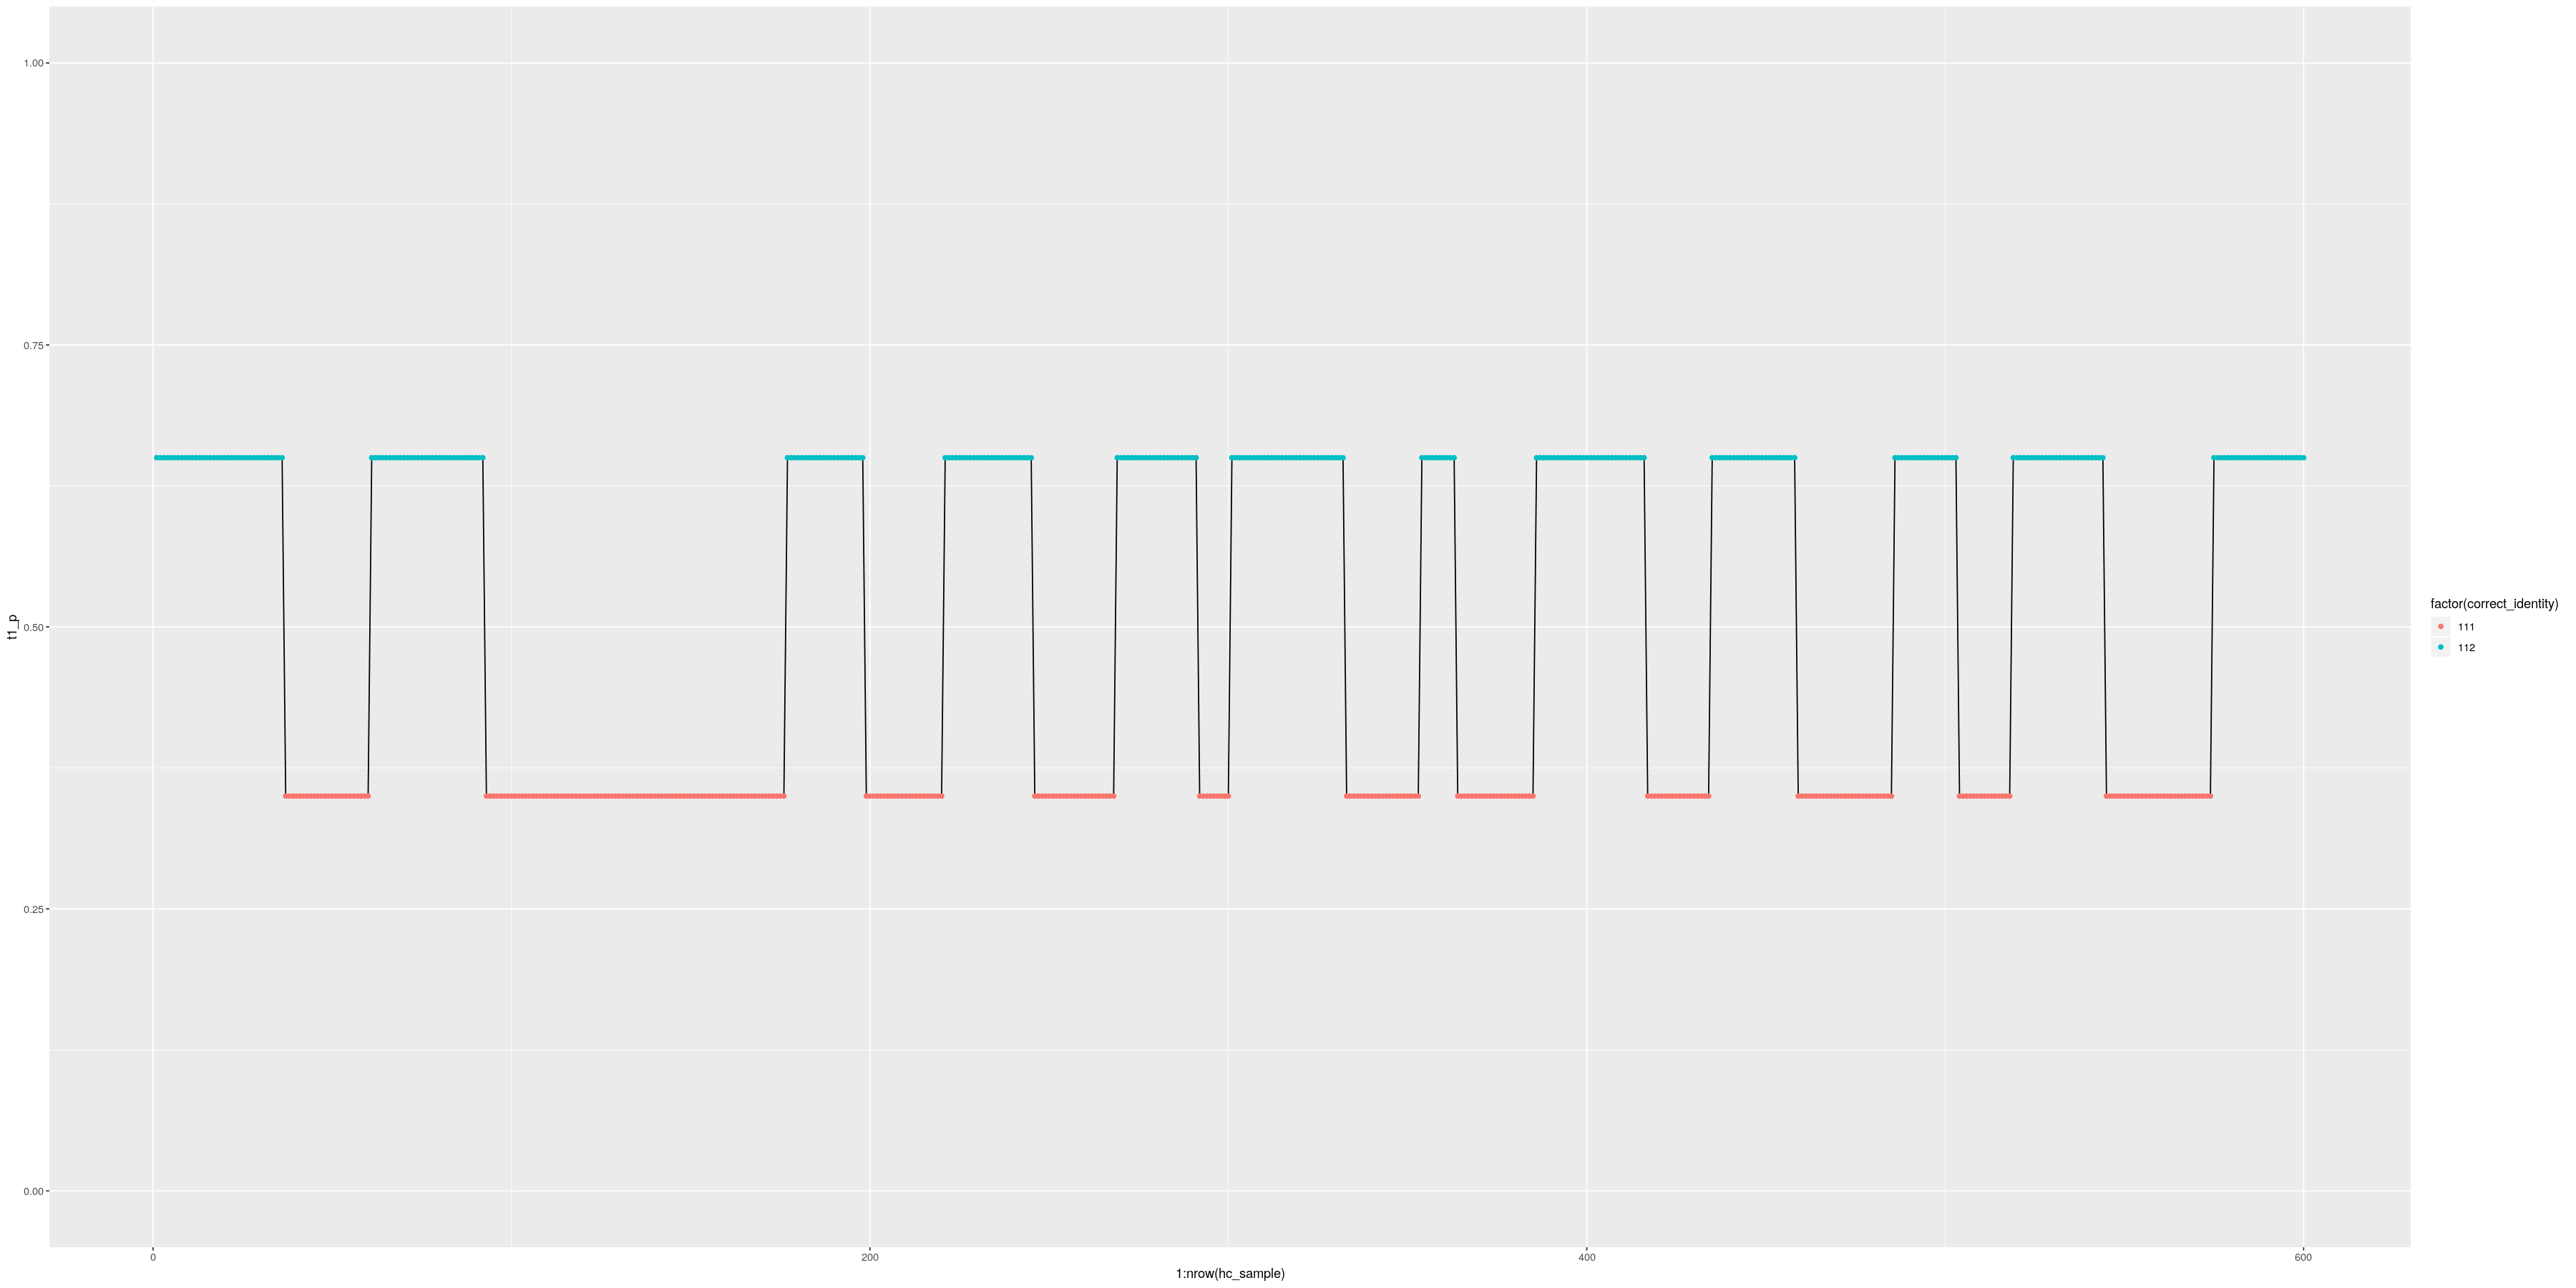

In [54]:
ggplot(hc_sample, aes(1:nrow(hc_sample), t1_p)) + geom_line() + geom_point(aes(colour = factor(correct_identity))) + ylim(0,1)

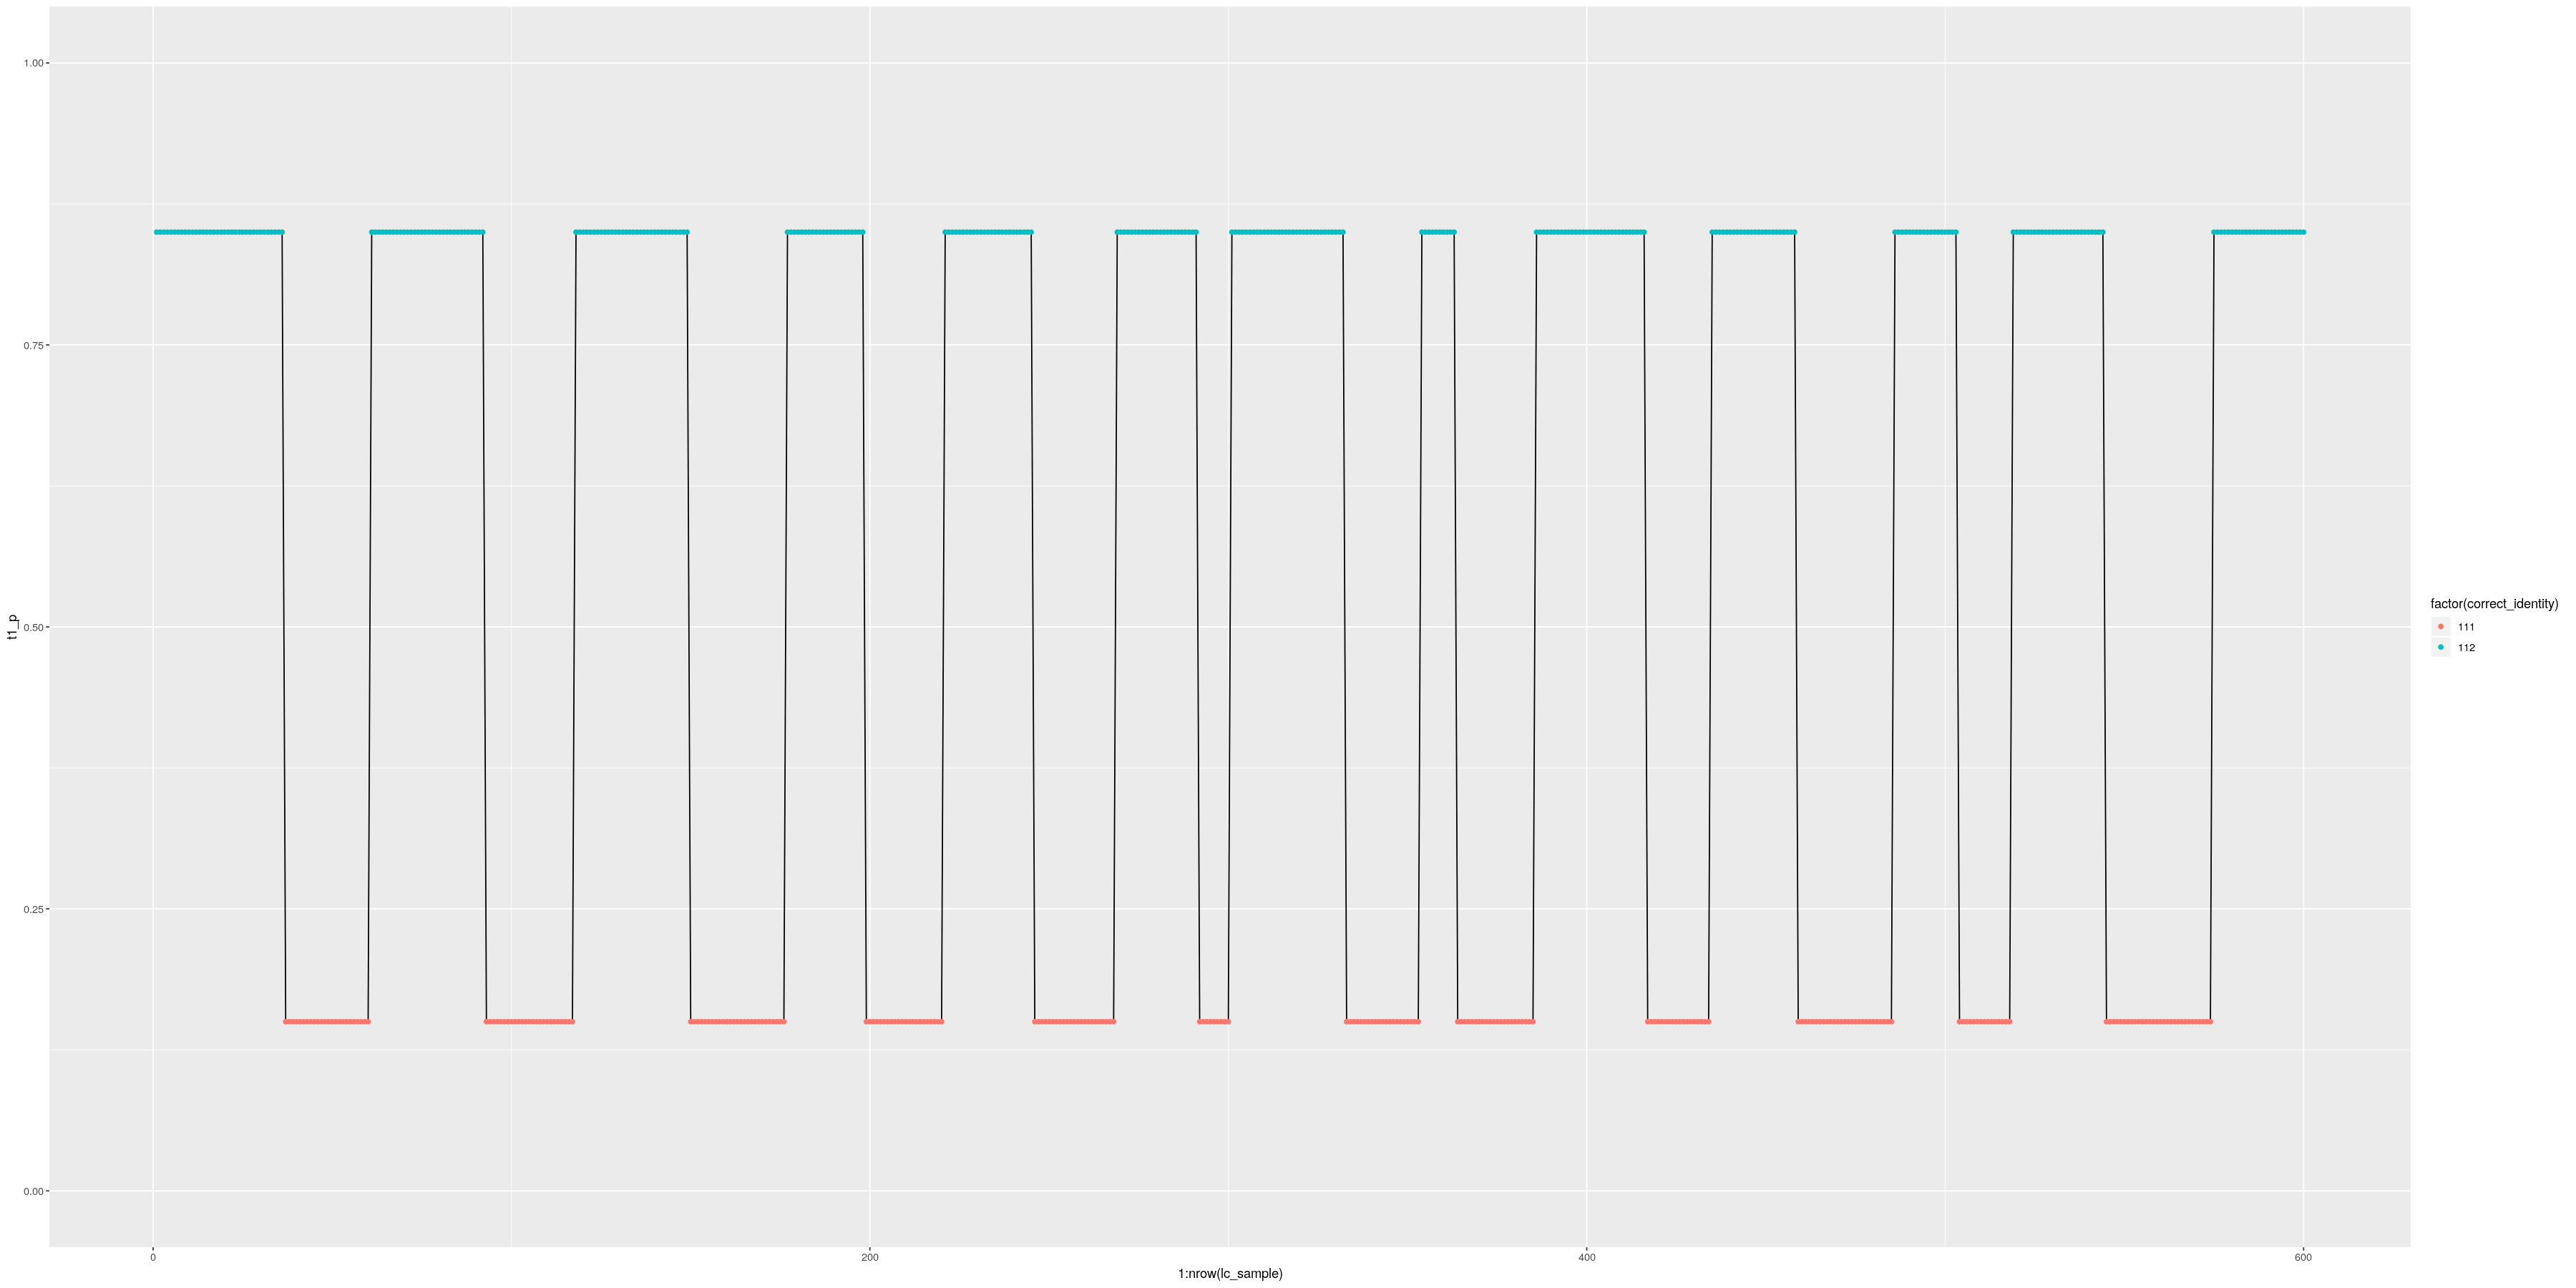

In [55]:
ggplot(lc_sample, aes(1:nrow(lc_sample), t1_p)) + geom_line() + geom_point(aes(colour = factor(correct_identity))) + ylim(0,1)

In [56]:
 nrow(df) == nrow(test_expanded)

[1] TRUE

In [57]:
length(761:784)

[1] 24

In [58]:
ordered_df <- arrange(test_expanded, condition, ID)

print_df<-subset(ordered_df, ID <= 784)

In [59]:
head(ordered_df)

c_prob_epoch_t0,max_p,epoch_n,epoch_trial,condition,trialset,ID,correct_identity,high_p,low_p,t0_p,t1_p
0.277778,0.722222,0,36,hc,0,761,112,0.65,0.35,0.35,0.65
0.277778,0.722222,0,36,hc,0,761,112,0.65,0.35,0.35,0.65
0.277778,0.722222,0,36,hc,0,761,112,0.65,0.35,0.35,0.65
0.277778,0.722222,0,36,hc,0,761,112,0.65,0.35,0.35,0.65
0.277778,0.722222,0,36,hc,0,761,112,0.65,0.35,0.35,0.65
0.277778,0.722222,0,36,hc,0,761,112,0.65,0.35,0.35,0.65


In [60]:
print_df$epoch_trial <- NULL

In [33]:
# print_df$max_p <- NULL 
# print_df$c_prob_epoch_t0 <- NULL 
# print_df$trialset <- NULL

In [61]:
agg_data_path = paste0(home,'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/')

write.csv(print_df, paste0(agg_data_path,'exp_param_df.csv'), row.names=FALSE)